## 1. Check data properties
### genes

#### scan file to get a summary data frame

In [1]:
with open("./data/count_matrix.csv", "r") as f1, open("./data/peak_names_out.csv", "r") as f2:
    droplets = f1.readline().split(",") 

    gene_hg_cnts = []
    gene_mm_cnts = []
    gene_hg_dropCover = []
    gene_mm_dropCover = []
    for i, (l1, l2) in enumerate(zip(f1, f2)):
        if i % 10000 == 0:
            print(f"processing line {i} on gene: {l2}")
        
        gene_cnts = sum(int(x) for x in l1.rstrip().split(","))
        gene_dropCover = sum([int(x) > 0 for x in l1.rstrip().split(",")]) 
        if l2.startswith("hg19"):       
            gene_hg_cnts.append(gene_cnts)
            gene_hg_dropCover.append(gene_dropCover)
        elif l2.startswith("mm10"):
            gene_mm_cnts.append(gene_cnts)
            gene_mm_dropCover.append(gene_dropCover)
        else:
            raise("Neither a human or mouse gene")

processing line 0 on gene: hg19_chr1:713971-714221

processing line 10000 on gene: hg19_chr1:203276194-203276444

processing line 20000 on gene: hg19_chr11:60253518-60253768

processing line 30000 on gene: hg19_chr12:123854345-123854595

processing line 40000 on gene: hg19_chr15:77197672-77197922

processing line 50000 on gene: hg19_chr17:37931823-37932073

processing line 60000 on gene: hg19_chr19:28503436-28503686

processing line 70000 on gene: hg19_chr2:203438666-203438916

processing line 80000 on gene: hg19_chr22:44734840-44735090

processing line 90000 on gene: hg19_chr4:79579176-79579426

processing line 100000 on gene: hg19_chr6:32408950-32409200

processing line 110000 on gene: hg19_chr8:580985-581235

processing line 120000 on gene: hg19_chrX:9434513-9434763

processing line 130000 on gene: mm10_chr1:172590670-172590920

processing line 140000 on gene: mm10_chr10:128044146-128044396

processing line 150000 on gene: mm10_chr11:109585121-109585371

processing line 160000 on ge

Save the summary data, since it takes 8min.

In [3]:
import pandas as pd
df_hg_genes = pd.DataFrame({"gene_hg_cnts": gene_hg_cnts, 
                            "gene_hg_dropCover": gene_hg_dropCover})

df_mm_genes = pd.DataFrame({"gene_mm_cnts": gene_mm_cnts, 
                            "gene_mm_dropCover": gene_mm_dropCover})                           
df_hg_genes.to_csv("mid_df_hg_genes.csv", index=False)
df_mm_genes.to_csv("mid_df_mm_genes.csv", index=False)

#### This part can be done without running previous part.

In [4]:
del df_hg_genes
del df_mm_genes
import pandas as pd
df_hg_genes = pd.read_csv("mid_df_hg_genes.csv")
df_mm_genes = pd.read_csv("mid_df_mm_genes.csv")

In [5]:
df_hg_genes.dtypes

gene_hg_cnts         int64
gene_hg_dropCover    int64
dtype: object

In [6]:
import matplotlib.pyplot as plt
import numpy as np

number of genes: 5578

In [7]:
df_hg_genes.shape

(122438, 2)

In [8]:
df_mm_genes.shape

(140357, 2)

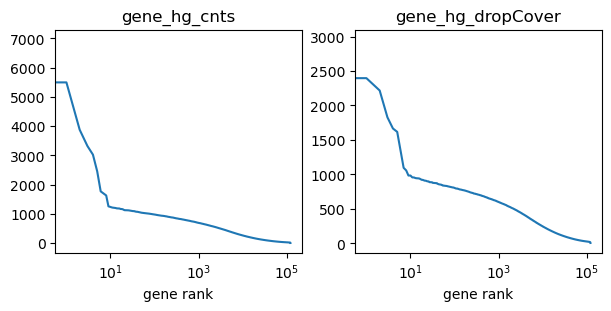

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), layout='constrained')
pooln = ["gene_hg_cnts", "gene_hg_dropCover"]
for i in range(2):
    axs[i].plot(sorted(df_hg_genes[pooln[i]], reverse=True))
    axs[i].set_xlabel('gene rank')
    axs[i].set_xscale("log")
    axs[i].set_title(pooln[i])

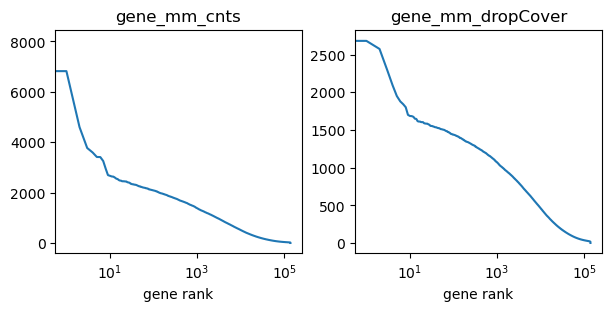

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), layout='constrained')
pooln = ["gene_mm_cnts", "gene_mm_dropCover"]
for i in range(2):
    axs[i].plot(sorted(df_mm_genes[pooln[i]], reverse=True))
    axs[i].set_xlabel('gene rank')
    axs[i].set_xscale("log")
    axs[i].set_title(pooln[i])

#### use gene drop cover as threshold, use the first 200 genes with highest dropCover

In [13]:
hg_thrsld = sorted(df_hg_genes["gene_hg_dropCover"],reverse=True)[200]
mm_thrsld = sorted(df_mm_genes["gene_mm_dropCover"],reverse=True)[200]

In [14]:
hg_thrsld

753

In [15]:
mm_thrsld

1343

#### use the threshold to choose genes, and save to csv as two count_matrixs for human and mouse

In [16]:
with open("./data/count_matrix.csv", "r") as f1, open("./data/peak_names_out.csv", "r") as f2:
    droplets = f1.readline().split(",") 
    cntMtx_hg = pd.DataFrame(columns=droplets,dtype="int16")
    cntMtx_mm = pd.DataFrame(columns=droplets,dtype="int16")
    for i, (l1, l2) in enumerate(zip(f1, f2)):
        if i % 15000 == 0:
            print(f"processing line {i} on gene: {l2}")
        gene = l2.rstrip()
        cnts = [int(x) for x in l1.rstrip().split(",")]
        cvg = sum([ y > 0 for y in cnts])
        if gene.startswith("hg19"):
            if cvg >= hg_thrsld:
                cntMtx_hg.loc[gene] = cnts
        elif gene.startswith("mm10"):
            if cvg >= mm_thrsld:
                cntMtx_mm.loc[gene] = cnts
        else:
            raise("Neither human or mouse gene")

processing line 0 on gene: hg19_chr1:713971-714221

processing line 15000 on gene: hg19_chr10:81026673-81026923

processing line 30000 on gene: hg19_chr12:123854345-123854595

processing line 45000 on gene: hg19_chr16:67562398-67562648

processing line 60000 on gene: hg19_chr19:28503436-28503686

processing line 75000 on gene: hg19_chr20:56039998-56040248

processing line 90000 on gene: hg19_chr4:79579176-79579426

processing line 105000 on gene: hg19_chr7:5569283-5569533

processing line 120000 on gene: hg19_chrX:9434513-9434763

processing line 135000 on gene: mm10_chr10:69889817-69890067

processing line 150000 on gene: mm10_chr11:109585121-109585371

processing line 165000 on gene: mm10_chr14:61660861-61661111

processing line 180000 on gene: mm10_chr17:14255976-14256226

processing line 195000 on gene: mm10_chr19:45134011-45134261

processing line 210000 on gene: mm10_chr3:102528328-102528578

processing line 225000 on gene: mm10_chr5:77155768-77156018

processing line 240000 on g

In [21]:
cntMtx_hg.index

Index(['hg19_chr1:11866020-11866270', 'hg19_chr1:23694732-23694982',
       'hg19_chr1:25071541-25071791', 'hg19_chr1:28052119-28052369',
       'hg19_chr1:36689739-36689989', 'hg19_chr1:40506094-40506344',
       'hg19_chr1:43232739-43232989', 'hg19_chr1:47184797-47185047',
       'hg19_chr1:67896086-67896336', 'hg19_chr1:85742304-85742554',
       ...
       'hg19_chr9:35732246-35732496', 'hg19_chr9:66458375-66458625',
       'hg19_chr9:82186562-82186812', 'hg19_chr9:91925737-91925987',
       'hg19_chr9:100395628-100395878', 'hg19_chr9:116163510-116163760',
       'hg19_chr9:128003606-128003856', 'hg19_chr9:131843148-131843398',
       'hg19_chr9:139981172-139981422', 'hg19_chrX:108297553-108297803'],
      dtype='object', length=204)

In [22]:
cntMtx_mm.index

Index(['mm10_chr1:7088642-7088892', 'mm10_chr1:9748363-9748613',
       'mm10_chr1:74284742-74284992', 'mm10_chr1:88277490-88277740',
       'mm10_chr1:92180430-92180680', 'mm10_chr10:5805495-5805745',
       'mm10_chr10:5824102-5824352', 'mm10_chr10:21994491-21994741',
       'mm10_chr10:39369559-39369809', 'mm10_chr10:40348995-40349245',
       ...
       'mm10_chr8:3754353-3754603', 'mm10_chr8:11555758-11556008',
       'mm10_chr8:69996276-69996526', 'mm10_chr8:69996544-69996794',
       'mm10_chr8:71272337-71272587', 'mm10_chr8:83955456-83955706',
       'mm10_chr8:84066559-84066809', 'mm10_chr8:120589090-120589340',
       'mm10_chr8:126594530-126594780', 'mm10_chr9:123461926-123462176'],
      dtype='object', length=204)

In [25]:
cntMtx_hg.to_csv("cntMtx_hg.csv", index=False)
cntMtx_mm.to_csv("cntMtx_mm.csv", index=False)